In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('spam_email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [7]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

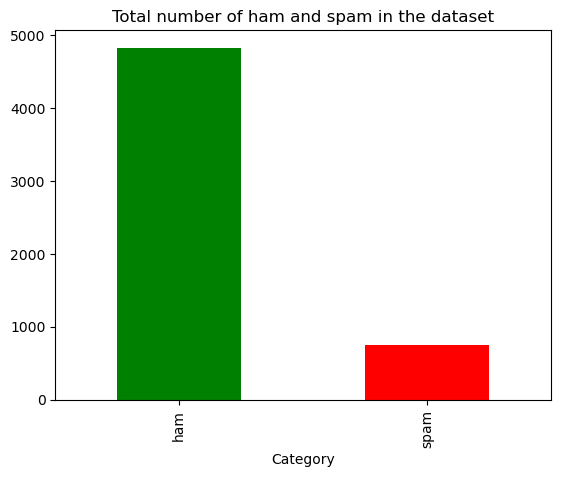

In [9]:
df['Category'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [11]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def clean_str(string):
    # Clean a string with RegexpTokenizer
    reg = RegexpTokenizer(r'[a-z]+')
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)


In [13]:
# replace category string with numeric
df['Category'] = df['Category'].map({'ham' : 0,'spam' : 1 })

In [15]:
# clean the message 
df['text_clean'] = df['Message'].apply(
  lambda string: clean_str(string))


In [17]:
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)


In [19]:
# Get the categories
y = df.Category


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
pred = model.predict(x_test)

In [41]:
print(model.score(x_test, y_test))

0.9704035874439462


In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cmat = confusion_matrix(y_test, pred)

AttributeError: QuadMesh.set() got an unexpected keyword argument 'xticklables'

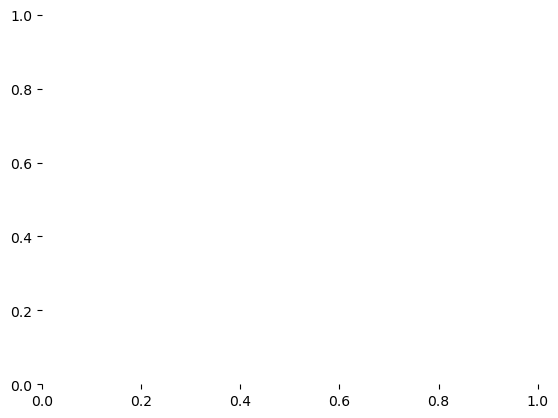

In [45]:
sns.heatmap(cmat, annot=True, cmap='Paired', cbar=False, fmt="d", xticklables=['Not Spam', 'Spam'], yticklabels =['Not Spam','Spam'])